# Lecture 9: Working in Python Volume 3 (Basic plotting, APIs and structured data)

## Basic plotting in Matplotlib

Matplotlib is the foundation of most Python plotting libraries. Other libraries generally build on top of it.
* Matplotlib gallery: https://matplotlib.org/gallery.html
* Seaborn gallery: https://seaborn.pydata.org/examples/index.html

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

In [220]:
x_values = [4, 5, 2, 5, 6, 7]

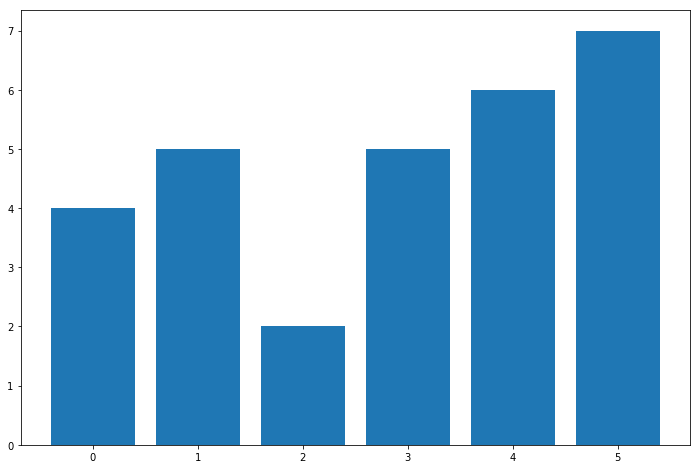

In [225]:
plt.bar(range(6), x_values)
plt.show()

Generally, Matplotlib works by iteratively building up elements off a plot.

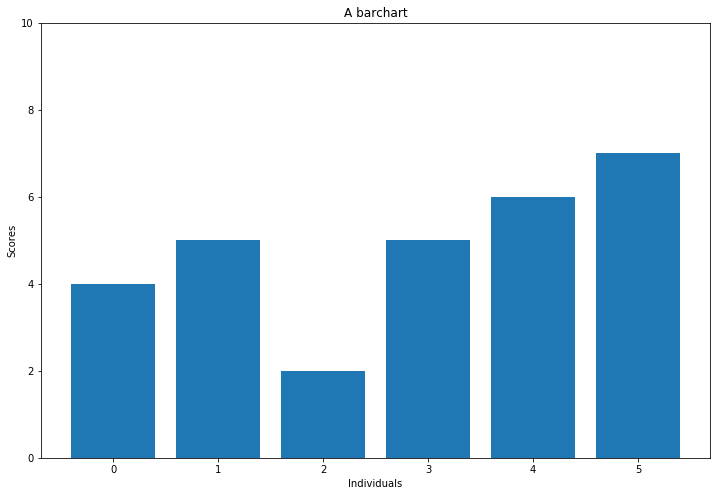

In [241]:
plt.bar(range(6), x_values)
plt.title("A barchart")
plt.xlabel("Individuals")
plt.ylabel("Scores")
plt.ylim([0, 10])
plt.show()

Getting random data with numpy

In [242]:
import numpy as np

In [243]:
x_values = np.random.rand(50)
y_values = np.random.rand(50)
colors = np.random.rand(50)
areas = (30 * np.random.rand(50))**2

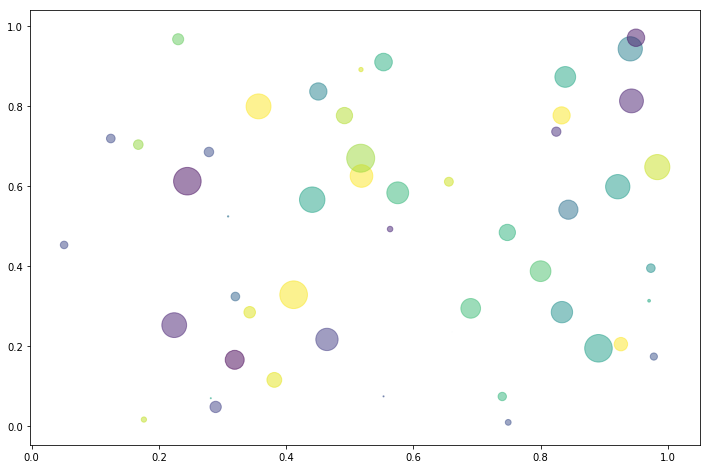

In [244]:
plt.scatter(x_values, y_values, s=areas, c=colors, alpha=0.5)
plt.show()

In [276]:
line_data = np.random.rand(10)

In [277]:
series = np.linspace(0,1,10)

In [278]:
series

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

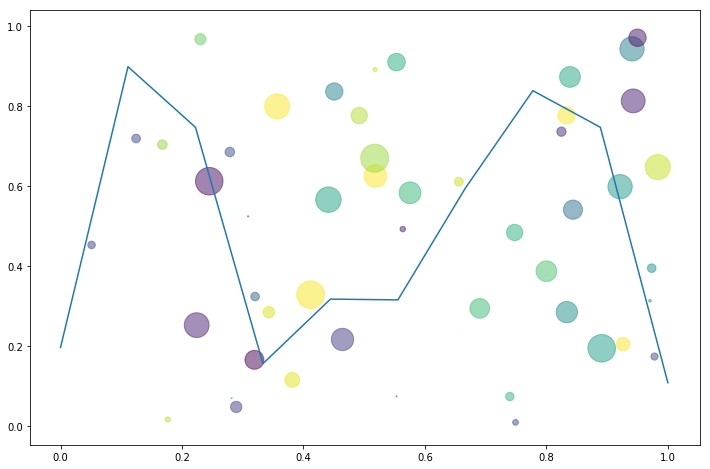

In [279]:
plt.scatter(x_values, y_values, s=areas, c=colors, alpha=0.5)
plt.plot(series, line_data)
plt.show()

## List comprehension

Understanding "list comprehension" is when Python really clicked for me. Let's say we have a list of numbers 1 to 10 and we want to apply a function to just the even numbers. We want to store this as a new list. We could do this as:

In [1]:
def f(x):
    return x*x

In [2]:
f(3)

9

In [3]:
values = list(range(1,11))

In [4]:
values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [5]:
for value in values:
    if value % 2 == 0:
        print(f(value))

4
16
36
64
100


In [6]:
new_values = []
for value in values:
    if value % 2 == 0:
        new_values.append(f(value))

In [7]:
new_values

[4, 16, 36, 64, 100]

Instead this can be done with a single list comprehension.

In [8]:
[f(value) for value in values if value % 2 == 0]

[4, 16, 36, 64, 100]

To step through in this construction:

In [9]:
[value for value in values]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [10]:
[value for value in values if value % 2 == 0]

[2, 4, 6, 8, 10]

In [11]:
[f(value) for value in values if value % 2 == 0]

[4, 16, 36, 64, 100]

Similarly, we can construct a dictionary comprehension with:

In [12]:
mapping = {value: f(value) for value in values if value % 2 == 0}

In [13]:
mapping

{2: 4, 4: 16, 6: 36, 8: 64, 10: 100}

In [14]:
mapping[4]

16

## Using APIs

Applicable Programming Interfaces (APIs) are central to what makes programming powerful. You don't have to build everything yourself, instead you call make a structured call to an API and it hands you back a structured response. You generally want "weakly coupled" components and APIs define the way in which components talk to each other.

In one example, can use Google Maps to look up a lat/long for a location. For example, we can look up "Addis Ababa" and figure out that it's lat/long is "8.9631702,38.7079335". But we want a programmatic way to do this. This is what APIs are good for. The GeoPy package gives an interface to communicate with geocoding services like Google's.

First we need to instead the package from PyPi via pip by running `pip install geopy` from the command line.

In [16]:
from geopy.geocoders import Nominatim

In [18]:
geolocator = Nominatim(user_agent="test")

In [19]:
location = geolocator.geocode("Addis Ababa")

In [20]:
print(location.address)

አዲስ አበባ / Addis Ababa, Addis Abeba, 1138, ኢ.ፌ.ዲ.ሪ.


In [21]:
print((location.latitude, location.longitude))

(9.0107934, 38.7612525)


In [22]:
print(location.raw)

{'place_id': '143793', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'node', 'osm_id': '27565076', 'boundingbox': ['8.8507934', '9.1707934', '38.6012525', '38.9212525'], 'lat': '9.0107934', 'lon': '38.7612525', 'display_name': 'አዲስ አበባ / Addis Ababa, Addis Abeba, 1138, ኢ.ፌ.ዲ.ሪ.', 'class': 'place', 'type': 'city', 'importance': 0.7198268879093099, 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_place_city.p.20.png'}


### Using the NCBI Entrez API to download single Genbank record

NCBI Entrez API allows searching of Genbank records like so: https://www.ncbi.nlm.nih.gov/nuccore?term=measles%5Btitle%5D%20AND%20viruses%5Bfilter%5D%20AND%20%28%225000%22%5BSLEN%5D%20%3A%20%2220000%22%5BSLEN%5D%29&cmd=DetailsSearch

The BioPython implementation of the Entrez API is described here: https://biopython.org/DIST/docs/api/Bio.Entrez-module.html

This is looking up accession `LC420351`: https://www.ncbi.nlm.nih.gov/nuccore/LC420351

In [23]:
from Bio import Entrez

In [24]:
Entrez.email = "tbedford@fredhutch.org"

In [25]:
handle = Entrez.efetch(db="nucleotide", id="LC420351", rettype="gb", retmode="text")

In [26]:
from Bio import GenBank

In [27]:
record = GenBank.read(handle)

In [28]:
record

In [29]:
dir(record)

['BASE_FEATURE_FORMAT',
 'BASE_FORMAT',
 'GB_BASE_INDENT',
 'GB_FEATURE_INDENT',
 'GB_FEATURE_INTERNAL_INDENT',
 'GB_INTERNAL_INDENT',
 'GB_LINE_LENGTH',
 'GB_OTHER_INTERNAL_INDENT',
 'GB_SEQUENCE_INDENT',
 'INTERNAL_FEATURE_FORMAT',
 'INTERNAL_FORMAT',
 'OTHER_INTERNAL_FORMAT',
 'SEQUENCE_FORMAT',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accession_line',
 '_base_count_line',
 '_comment_line',
 '_contig_line',
 '_db_source_line',
 '_dblink_line',
 '_definition_line',
 '_features_line',
 '_keywords_line',
 '_locus_line',
 '_nid_line',
 '_organism_line',
 '_origin_line',
 '_pid_line',
 '_project_line',
 '_segment_line',
 '_sequence_line',
 '_source_line',
 '_ver

In [30]:
record.accession

['LC420351']

In [31]:
record.source

'Measles morbillivirus'

In [43]:
record.sequence[0:500]

'ACCAAACAAAGTTGGGTAAGGATAGATCAATCAATGATCATATTCTAGTACACTTAGGATTCAAGATCCTATTATCAGGGACAAGAGCAGGATTAGGGATATCCGAGGGCGCGCCATGGTGAGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCGAGCTGGACGGCGACGTAAACGGCCACAAGTTCAGCGTGTCCGGCGAGGGCGAGGGCGATGCCACCTACGGCAAGCTGACCCTGAAGTTCATCTGCACCACCGGCAAGCTGCCCGTGCCCTGGCCCACCCTCGTGACCACCCTGACCTACGGCGTGCAGTGCTTCAGCCGCTACCCCGACCACATGAAGCAGCACGACTTCTTCAAGTCCGCCATGCCCGAAGGCTACGTCCAGGAGCGCACCATCTTCTTCAAGGACGACGGCAACTACAAGACCCGCGCCGAGGTGAAGTTCGAGGGCGACACCCTGGTGAACCGCATCGAGCTGAAGGGCA'

In [62]:
record.features[0].qualifiers[0].key

'/organism='

In [63]:
record.features[0].qualifiers[0].value

'"Measles morbillivirus"'

In [73]:
for qualifier in record.features[0].qualifiers:
    print(qualifier.key, qualifier.value)

/organism= "Measles morbillivirus"
/mol_type= "viral cRNA"
/strain= "IC323-EGFP"
/db_xref= "taxon:11234"
/country= "Japan"
/note= "derived from Measles virus IC-B strain"


In [81]:
for qualifier in record.features[0].qualifiers:
    if qualifier.key == "/country=":
        print(qualifier.value.replace("\"", ""))

Japan


In [86]:
def get_country_for_record(record):
    for qualifier in record.features[0].qualifiers:
        if qualifier.key == "/country=":
            return(qualifier.value.replace("\"", ""))

In [87]:
get_country_for_record(record)

'Japan'

In [94]:
def get_record_for_accession(accession):
    handle = Entrez.efetch(db="nucleotide", id=accession, rettype="gb", retmode="text")
    record = GenBank.read(handle)
    return(record)

In [96]:
get_record_for_accession("LC420351")

In [97]:
get_country_for_record(get_record_for_accession("LC420351"))

'Japan'

### Using the NCBI Entrez API to search for Genbank records

In [33]:
handle = Entrez.esearch(db="nucleotide",
            retmax=10,
            term="measles[title] AND viruses[filter]",
            idtype="acc")

In [34]:
handle

<_io.TextIOWrapper encoding='utf-8'>

In [35]:
records = Entrez.read(handle)

In [36]:
dir(records)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'attributes',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'tag',
 'update',
 'values']

In [37]:
records["Count"]

'15613'

In [38]:
handle = Entrez.esearch(db="nucleotide", retmax=500,
            term="measles[title] AND viruses[filter] AND (5000[SLEN] : 20000[SLEN])", 
            idtype="acc")

In [39]:
records = Entrez.read(handle)

In [40]:
records["Count"]

'207'

In [101]:
accessions = records["IdList"]

In [102]:
len(accessions)

207

In [189]:
countries = [get_country_for_record(get_record_for_accession(accession)) for accession in accessions[0:50]]

In [190]:
countries

['Japan',
 None,
 'Canada: Alberta, Calgary',
 'Australia: Brisbane',
 'Italy',
 'China',
 None,
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Sudan',
 'Netherlands',
 'Japan',
 'France',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 None,
 'China',
 'France',
 None,
 'Viet Nam',
 'Viet Nam',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 None,
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom']

In [191]:
countries = [country for country in countries if country != None]

In [192]:
countries

['Japan',
 'Canada: Alberta, Calgary',
 'Australia: Brisbane',
 'Italy',
 'China',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Sudan',
 'Netherlands',
 'Japan',
 'France',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'China',
 'France',
 'Viet Nam',
 'Viet Nam',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom']

In [193]:
countries = list(set(countries))

In [194]:
countries

['USA',
 'Canada: Alberta, Calgary',
 'Italy',
 'China',
 'Viet Nam',
 'Australia: Brisbane',
 'Sudan',
 'United Kingdom',
 'France',
 'Netherlands',
 'Japan']

## Geocoding from this list of countries

In [195]:
locations = [geolocator.geocode(country) for country in countries]

In [197]:
locations

[Location(USA, (39.7837304, -100.4458825, 0.0)),
 Location(Calgary, Alberta, Canada, (51.02532675, -114.049868485806, 0.0)),
 Location(Italia, (42.6384261, 12.674297, 0.0)),
 Location(中国, (35.000074, 104.999927, 0.0)),
 Location(Việt Nam, (13.2904027, 108.4265113, 0.0)),
 Location(Brisbane, QLD, 4000, Australia, (-27.4689682, 153.0234991, 0.0)),
 Location(السودان, (14.5844444, 29.4917691, 0.0)),
 Location(UK, (54.7023545, -3.2765753, 0.0)),
 Location(France métropolitaine, France, (46.603354, 1.8883335, 0.0)),
 Location(Nederland, (52.2379891, 5.53460738161551, 0.0)),
 Location(日本, (36.5748441, 139.2394179, 0.0))]

In [198]:
dir(locations[0])

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_address',
 '_point',
 '_raw',
 '_tuple',
 'address',
 'altitude',
 'latitude',
 'longitude',
 'point',
 'raw']

In [199]:
locations[0].address

'USA'

Can use GeoJSON to display geographic data. Use http://geojson.io.

Example GeoJSON file
```
{
    "type": "FeatureCollection",
    "features": [{
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [-77.03238901390978, 38.913188059745586]
        },
        "properties": {
            "title": "Location A"
        }
    }, {
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [-122.414, 37.776]
        },
        "properties": {
            "title": "Location B"
        }
    }]
}
```

In [200]:
features = []
for location in locations:
    json_element = {
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [location.longitude, location.latitude]
        },
        "properties": {
            "title": location.address
        }
    }
    features.append(json_element)

In [201]:
features

[{'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [-100.4458825, 39.7837304]},
  'properties': {'title': 'USA'}},
 {'type': 'Feature',
  'geometry': {'type': 'Point',
   'coordinates': [-114.049868485806, 51.02532675]},
  'properties': {'title': 'Calgary, Alberta, Canada'}},
 {'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [12.674297, 42.6384261]},
  'properties': {'title': 'Italia'}},
 {'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [104.999927, 35.000074]},
  'properties': {'title': '中国'}},
 {'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [108.4265113, 13.2904027]},
  'properties': {'title': 'Việt Nam'}},
 {'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [153.0234991, -27.4689682]},
  'properties': {'title': 'Brisbane, QLD, 4000, Australia'}},
 {'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [29.4917691, 14.5844444]},
  'properties': {'title': 'السودان'}},
 {'type': 'Featur

In [202]:
geojson = {
    "type": "FeatureCollection",
    "features": features
}

In [203]:
import json
with open('geo.json', 'w') as outfile:
    json.dump(geojson, outfile, indent=1)

# Exercise

Exercise is to search for articles on PubMed that contain the word "CRISPR" in the title. Retrieve 20of these entries and parse date from the entry. Plot the number of papers per year. When this is working, up the retrieval to 1000.

Some hints:

In [280]:
handle = Entrez.esearch(db="pubmed",
            retmax=10,
            term="CRISPR",
            idtype="acc")